/var/folders/vg/y5ndl75n2yncdzxy8zy2pr8r0000gp/T/ipykernel_44205/3337299592.py:20: RuntimeWarning: overflow encountered in scalar multiply
  d_receptor = -k_on1 * antibody * receptor + k_off1 * (antibody * receptor) - k_on2 * (antibody * receptor) * receptor + k_off2 * (receptor * antibody * receptor)
/var/folders/vg/y5ndl75n2yncdzxy8zy2pr8r0000gp/T/ipykernel_44205/3337299592.py:20: RuntimeWarning: invalid value encountered in scalar add
  d_receptor = -k_on1 * antibody * receptor + k_off1 * (antibody * receptor) - k_on2 * (antibody * receptor) * receptor + k_off2 * (receptor * antibody * receptor)


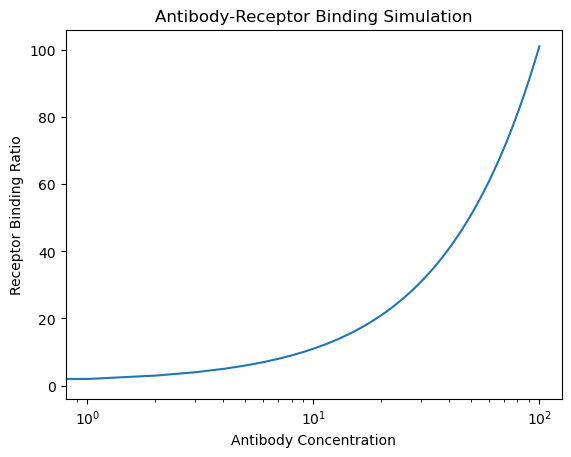

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import simpy

# Parameters
k_on = 0.1
k_off = 0.05
k_on1 = 2 * k_on
k_off1 = k_off
k_on2_factor = 1.5
k_on2 = k_on2_factor * k_on
k_off2 = 2 * k_off


# Define the differential equations
def antibody_dt(antibody, receptor, k_on1, k_off1, k_on2, k_off2):
    d_antibody = -k_on1 * antibody * receptor + k_off1 * (antibody * receptor)
    return d_antibody


def receptor_dt(antibody, receptor, k_on1, k_off1, k_on2, k_off2):
    d_receptor = (
        -k_on1 * antibody * receptor
        + k_off1 * (antibody * receptor)
        - k_on2 * (antibody * receptor) * receptor
        + k_off2 * (receptor * antibody * receptor)
    )
    return d_receptor


# Simulation function
def simulate(k_on1, k_off1, k_on2, k_off2):
    antibody_concentration = np.linspace(0, 100, 100)
    receptor_ratio = []

    for antibody in antibody_concentration:
        receptor = 1  # Initial receptor concentration
        env = simpy.Environment()
        env.process(receptor_update(env, antibody, receptor, k_on1, k_off1, k_on2, k_off2))
        env.run(until=100)  # Run simulation for 100 time units
        receptor_ratio.append((antibody + receptor) / receptor)  # Calculate receptor ratio

    return antibody_concentration, receptor_ratio


# Process for receptor update
def receptor_update(env, antibody, receptor, k_on1, k_off1, k_on2, k_off2):
    while True:
        receptor_change = receptor_dt(antibody, receptor, k_on1, k_off1, k_on2, k_off2)
        receptor += receptor_change
        yield env.timeout(1)  # Time step for simulation


# Run simulation
antibody_concentration, receptor_ratio = simulate(k_on1, k_off1, k_on2, k_off2)

# Plot results
plt.plot(antibody_concentration, receptor_ratio)
plt.xlabel("Antibody Concentration")
plt.ylabel("Receptor Binding Ratio")
plt.title("Antibody-Receptor Binding Simulation")
plt.xscale("log")
plt.show()

/var/folders/vg/y5ndl75n2yncdzxy8zy2pr8r0000gp/T/ipykernel_44205/309324192.py:20: RuntimeWarning: overflow encountered in scalar multiply
  d_receptor = -k_on1 * antibody * receptor + k_off1 * (antibody * receptor) - k_on2 * (antibody * receptor) * receptor + k_off2 * (receptor * antibody * receptor)
/var/folders/vg/y5ndl75n2yncdzxy8zy2pr8r0000gp/T/ipykernel_44205/309324192.py:20: RuntimeWarning: invalid value encountered in scalar add
  d_receptor = -k_on1 * antibody * receptor + k_off1 * (antibody * receptor) - k_on2 * (antibody * receptor) * receptor + k_off2 * (receptor * antibody * receptor)
/var/folders/vg/y5ndl75n2yncdzxy8zy2pr8r0000gp/T/ipykernel_44205/309324192.py:16: RuntimeWarning: overflow encountered in scalar multiply
  d_antibody = -k_on1 * antibody * receptor + k_off1 * (antibody * receptor)
/var/folders/vg/y5ndl75n2yncdzxy8zy2pr8r0000gp/T/ipykernel_44205/309324192.py:16: RuntimeWarning: invalid value encountered in scalar add
  d_antibody = -k_on1 * antibody * receptor

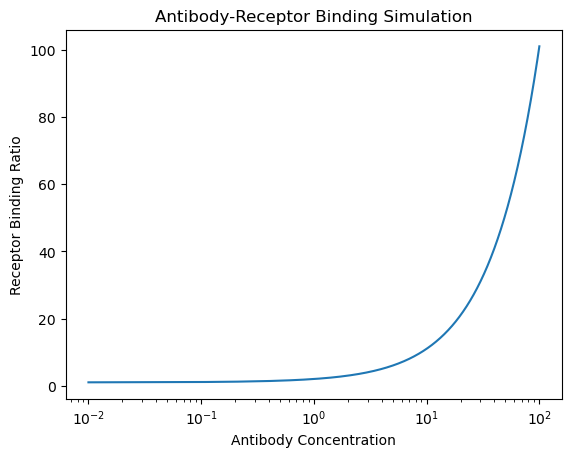

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import simpy

# Parameters
k_on = 0.1
k_off = 0.05
k_on1 = 2 * k_on
k_off1 = k_off
k_on2_factor = 1.5
k_on2 = k_on2_factor * k_on
k_off2 = 2 * k_off


# Define the differential equations
def antibody_dt(antibody, receptor, k_on1, k_off1, k_on2, k_off2):
    d_antibody = -k_on1 * antibody * receptor + k_off1 * (antibody * receptor)
    return d_antibody


def receptor_dt(antibody, receptor, k_on1, k_off1, k_on2, k_off2):
    d_receptor = (
        -k_on1 * antibody * receptor
        + k_off1 * (antibody * receptor)
        - k_on2 * (antibody * receptor) * receptor
        + k_off2 * (receptor * antibody * receptor)
    )
    return d_receptor


# Simulation function
def simulate(k_on1, k_off1, k_on2, k_off2):
    antibody_concentration = np.linspace(0.01, 100, 1000)
    receptor_ratio = []

    for antibody in antibody_concentration:
        receptor = 1  # Initial receptor concentration
        env = simpy.Environment()
        env.process(receptor_update(env, antibody, receptor, k_on1, k_off1, k_on2, k_off2))
        env.run(until=100)  # Run simulation for 100 time units
        receptor_ratio.append((antibody + receptor) / receptor)  # Calculate receptor ratio

    return antibody_concentration, receptor_ratio


# Process for receptor update
def receptor_update(env, antibody, receptor, k_on1, k_off1, k_on2, k_off2):
    while True:
        # Calculate changes in receptor and antibody concentrations
        d_receptor = receptor_dt(antibody, receptor, k_on1, k_off1, k_on2, k_off2)
        d_antibody = antibody_dt(antibody, receptor, k_on1, k_off1, k_on2, k_off2)

        # Update receptor and antibody concentrations
        receptor += d_receptor
        antibody += d_antibody

        yield env.timeout(1)  # Time step for simulation


# Run simulation
antibody_concentration, receptor_ratio = simulate(k_on1, k_off1, k_on2, k_off2)

# Plot results
plt.plot(antibody_concentration, receptor_ratio)
plt.xlabel("Antibody Concentration")
plt.ylabel("Receptor Binding Ratio")
plt.title("Antibody-Receptor Binding Simulation")
plt.xscale("log")
plt.show()

In [20]:
import simpy
import random
import statistics

wait_times = []

class Theater(object):
    def __init__(self, env, num_cashiers, num_servers, num_ushers):
        self.env = env
        self.cashier = simpy.Resource(env, num_cashiers)
        self.server = simpy.Resource(env, num_servers)
        self.usher = simpy.Resource(env, num_ushers)

    def purchase_ticket(self, moviegoer):
        yield self.env.timeout(random.randint(1, 3))

    def check_ticket(self, moviegoer):
        yield self.env.timeout(3 / 60)

    def sell_food(self, moviegoer):
        yield self.env.timeout(random.randint(1, 5))


def go_to_movies(env, moviegoer, theater):
    # Moviegoer arrives at the theater
    arrival_time = env.now

    with theater.cashier.request() as request:
        yield request
        yield env.process(theater.purchase_ticket(moviegoer))

    with theater.usher.request() as request:
        yield request
        yield env.process(theater.check_ticket(moviegoer))

    if random.choice([True, False]):
        with theater.server.request() as request:
            yield request
            yield env.process(theater.sell_food(moviegoer))

    # Moviegoer heads into the theater
    wait_times.append(env.now - arrival_time)


def run_theater(env, num_cashiers, num_servers, num_ushers):
    theater = Theater(env, num_cashiers, num_servers, num_ushers)

    for moviegoer in range(3):
        env.process(go_to_movies(env, moviegoer, theater))

    while True:
        yield env.timeout(0.20)  # Wait a bit before generating a new person

        moviegoer += 1
        env.process(go_to_movies(env, moviegoer, theater))


def get_average_wait_time(wait_times):
    average_wait = statistics.mean(wait_times)
    return average_wait  # Fix: Return the calculated average wait time


def calculate_wait_time(arrival_times, departure_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1)
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)


def get_user_input():
    num_cashiers = input("Input # of cashiers working: ")
    num_servers = input("Input # of servers working: ")
    num_ushers = input("Input # of ushers working: ")
    params = [num_cashiers, num_servers, num_ushers]
    if all(str(i).isdigit() for i in params):  # Check input is valid
        params = [int(x) for x in params]
    else:
        print(
            "Could not parse input. The simulation will use default values:",
            "\n1 cashier, 1 server, 1 usher.",
        )
        params = [1, 1, 1]
    return params


def main():
    # Setup
    random.seed(42)
    num_cashiers, num_servers, num_ushers = get_user_input()

    # Run the simulation
    env = simpy.Environment()
    env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
    env.run(until=90)

    # View the results
    avg_wait_time = get_average_wait_time(wait_times)  # Fix: Store the average wait time
    mins, secs = divmod(avg_wait_time, 60)  # Fix: Calculate minutes and seconds
    print(
        "Running simulation...",
        f"\nThe average wait time is {int(mins)} minutes and {int(secs)} seconds.",
    )


if __name__ == "__main__":
    main()


Running simulation... 
The average wait time is 0 minutes and 38 seconds.


In [ ]:


class Antibody:
    def __init__(self, k_on1, k_on2):
        self.k_on1 = k_on1
        self.k_on2 = k_on2
        self.bound_receptors = set()

    def bind_receptor(self, receptor):
        if len(self.bound_receptors) < 2:
            self.bound_receptors.add(receptor)
        else:
            if random.random() < self.k_on2:
                # Rebind to another receptor
                self.bound_receptors.pop()
                self.bound_receptors.add(receptor)

class Receptor:
    def __init__(self, epitope1, epitope2):
        self.epitope1 = epitope1
        self.epitope2 = epitope2

